In [8]:
%cd "C:\Users\andrewmauro\Desktop\springboard\Project Excercises\Kaggle - Mercari Price Suggestion"

C:\Users\andrewmauro\Desktop\springboard\Project Excercises\Kaggle - Mercari Price Suggestion


Purpose: 

To gain an understanding of the Mercari Price Suggestion dataset by creating vizualizations of the item price distribution for the different variable categories avaiable in the dataset. Specifically, we will test the following hypotheses:

1. Item condition 1 is the "best" condition or closest to "new." Lower-number item conditions will therefore have higher price distributions than higher number item conditions.

2. Items that include shipping in the price will have price distributions that include higher prices than items that do not include shipping.

3. High-Level Item Categories "Electronics" and "Vintage and Collectibles" will have the highest average price of all High-Level Item Categories.

Procedures

We constructed five sets of plots depicting the distribution of prices for a set of factor variables. The first plot depicts price distribution by item condition. There are four condition identifiers in the data set (numbers 1-4). At the outset, we are not sure what each condition identifier means.

The second plot set depicts price by shipping status (0, 1 - No Shipping, Shipping), and the final three sets of plots depicts price by the highest-level item cetegory, with three item categories depicted in each plot set. 

In each set of plots, we have created a boxplot, violinplot, swarmplot, and a kernel density plot.

Conclusion:

Hypothesis 1 - I reject the hypothesis that Item condition 1 is the "best" condition or closest to new, based on preliminary visualization results. During the analysis I noted the following:

(a) The prices for all conditions are skewed right as most observations have prices under $50 accross all condition types.

(b) Average price appears to increase slightly as we move from condition 1 to condition 4. 

Hypothesis 2 - I reject this hypothesis. The price of items that include shipping are generally lower than prices that do not inlude shipping. Likely this is because more valueable items are more expensive to ship, and the sellers thus pass this cost onto the buyer.

Hypothesis 3 - 

(a) Brand Name -  PINK and Nike have the largest brand counts (excluding unknowns, which are actually the largest category by far). Air Jordan and Burberry have the highest average price.
(b) High Level Item Category - Women's is the largest high level item category by count(excluding unknowns). Electronics, Men's and Women's have the highest average price.

Section 1 - Data Ingestion, Wrangling, and Manipulation

The below code will import the training set and then perform basic data manipulation to obtain a dataset with some additional category features. 

In [9]:
#Section 1.1 - Import packages and Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

price = pd.read_csv('trainViz.csv', sep = ',', encoding = 'latin-1', index_col = 'train_id')


C:\Users\andrewmauro\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
#Section 1.2 - Check Shape; Store Sampling code if needed

#10% sample of rows#
#sampleSize = int(round(price.shape[0] * .1, 0)) 

price = pd.DataFrame.sample(price, n = 100)

In [11]:
#Section 1.5 - Check Initial Rows
price.head(5)


,item_condition_id,brand_name,shipping,catOne,catTwo,meanBrand,countBrand,meanLevelOne,countLevelOne,meanLevelTwo,countLevelTwo,price
train_id,,,,,,,,,,,,
1095110,2,unknown,1,women,dresses,21.133453,632682.0,28.885496,664385.0,29.445015,45758.0,15.0
877628,3,athleta,1,women,athletic apparel,23.404088,636.0,28.885496,664385.0,28.844614,123457.0,60.0
1268415,1,unknown,1,women,jeans,21.133453,632682.0,28.885496,664385.0,25.885614,32338.0,80.0
1337064,3,adidas,0,men,coats & jackets,43.127328,10202.0,34.708614,93680.0,34.569310,3304.0,20.0
509411,2,garmin,1,electronics,"car audio, video & gps",49.462882,229.0,35.173922,122690.0,37.874031,516.0,45.0


In [12]:
%matplotlib inline


In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


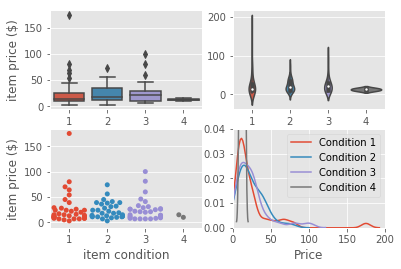

In [14]:
#Section 2.1 - Visualize Variables - Item Condition

#box plot
plt.subplot(2,2,1)
sns.boxplot(x = 'item_condition_id', y = 'price', data = price)
plt.ylabel('item price ($)')
plt.xlabel('')

#violin
plt.subplot(2,2,2)
sns.violinplot(x = 'item_condition_id', y = 'price', data = price)
plt.ylabel('')
plt.xlabel('')

#swarm
plt.subplot(2,2,3)
sns.swarmplot(x = 'item_condition_id', y = 'price', data = price)
plt.ylabel('item price ($)')
plt.xlabel('item condition')

#convert data and then do a plot of distributions overlayed - kde plot
plt.subplot(2,2,4)
variable = price[['item_condition_id', 'price']]

sns.kdeplot(variable.price[variable['item_condition_id'] == 1], label = "Condition 1")
sns.kdeplot(variable.price[variable['item_condition_id'] == 2], label = "Condition 2")
sns.kdeplot(variable.price[variable['item_condition_id'] == 3], label = "Condition 3")
sns.kdeplot(variable.price[variable['item_condition_id'] == 4], label = "Condition 4")

plt.xlim(xmax = 200, xmin = 0)
plt.ylim(ymax = .040, ymin = 0)

plt.ylabel('')
plt.xlabel('Price')

plt.show()

#set and show
plt.tight_layout()
plt.show()

#set and show
plt.tight_layout()
plt.show()




Conclusion: The prices for all conditions are skewed right as most observations have prices under $50 accross all condition types.

Average price appears to increase slightly as we move from Condition 1 to condition 4.

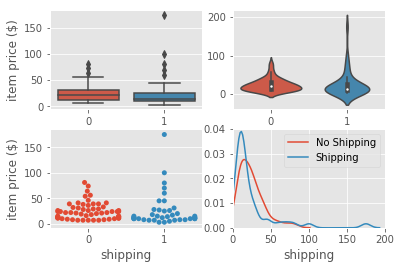

In [15]:
#Section 2.2 - Visualize Variables - Shipping

#box plot
plt.subplot(2,2,1)
sns.boxplot(x = 'shipping', y = 'price', data = price)
plt.ylabel('item price ($)')
plt.xlabel('')

#violin
plt.subplot(2,2,2)
sns.violinplot(x = 'shipping', y = 'price', data = price)
plt.ylabel('')
plt.xlabel('')

#swarm
plt.subplot(2,2,3)
sns.swarmplot(x = 'shipping', y = 'price', data = price)
plt.ylabel('item price ($)')
plt.xlabel('shipping')

#convert data and then do a plot of distributions overlayed - kde plot
plt.subplot(2,2,4)
variable = price[['shipping', 'price']]

sns.kdeplot(variable.price[variable['shipping'] == 0], label = "No Shipping")
sns.kdeplot(variable.price[variable['shipping'] == 1], label = "Shipping")

plt.xlim(xmax = 200, xmin = 0)
plt.ylim(ymax = .040, ymin = 0)

plt.ylabel('')
plt.xlabel('shipping')

plt.show()

#set and show
plt.tight_layout()
plt.show()

Conclusion: I reject the hypothesis that items with shipping included are higher priced on average than items with lower prices. 

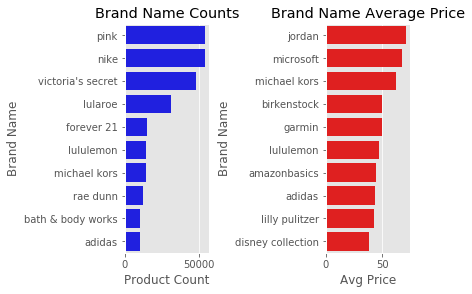

In [16]:
#Section 2.3 - Visualize Variables - Brand Name

#count plot
#df = price[['brand_name', 'countBrand']].drop_duplicates().sort_values("countBrand", ascending = False)[:10]
df = price.loc[(price.brand_name != 'unknown') , ['brand_name', 'countBrand']].drop_duplicates().sort_values("countBrand", ascending = False)[:10]
plt.subplot(1,2,1)
sns.barplot(x="countBrand", y="brand_name", data=df,
            label="Total", color="b")

plt.title('Brand Name Counts')
plt.ylabel('Brand Name')
plt.xlabel('Product Count')

#average plot 1
#df = price[['brand_name', 'countBrand']].drop_duplicates().sort_values("countBrand", ascending = False)[:10]
df = price.loc[(price.brand_name != 'unknown') , ['brand_name', 'meanBrand']].drop_duplicates().sort_values("meanBrand", ascending = False)[:10]
plt.subplot(1,2,2)
sns.barplot(x="meanBrand", y="brand_name", data=df,
            label="Total", color="r")

plt.title('Brand Name Average Price')
plt.ylabel('Brand Name')
plt.xlabel('Avg Price')

plt.tight_layout(pad=0.4, w_pad=0.5)




Conclusion: pink and nike have the largest brand counts (excluding unknowns, which are actually the largest category by far). Air Jordan and Microsoft have the highest average price.

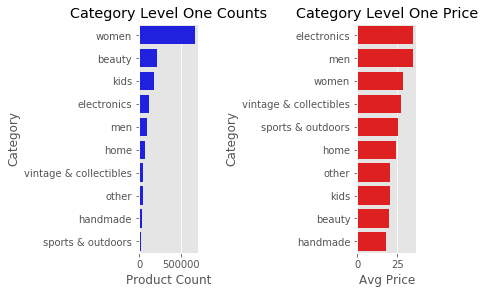

In [17]:
#Section 2.4 - Visualize Variables - High Level Item Category (1)

#count plot
#df = price[['brand_name', 'countBrand']].drop_duplicates().sort_values("countBrand", ascending = False)[:10]
df = price.loc[(price.catOne != 'unknown') , ['catOne', 'countLevelOne']].drop_duplicates().sort_values("countLevelOne", ascending = False)[:10]
plt.subplot(1,2,1)
sns.barplot(x="countLevelOne", y="catOne", data=df,
            label="Total", color="b")

plt.title('Category Level One Counts')
plt.ylabel('Category')
plt.xlabel('Product Count')

#average plot 1
#df = price[['brand_name', 'countBrand']].drop_duplicates().sort_values("countBrand", ascending = False)[:10]
df = price.loc[(price.catOne != 'unknown') , ['catOne', 'meanLevelOne']].drop_duplicates().sort_values("meanLevelOne", ascending = False)[:10]
plt.subplot(1,2,2)
sns.barplot(x="meanLevelOne", y="catOne", data=df,
            label="Total", color="r")

plt.title('Category Level One Price')
plt.ylabel('Category')
plt.xlabel('Avg Price')

plt.tight_layout(pad=0.4, w_pad=0.5)




Conclusion: Women's is the largest high level item category by count(excluding unknowns). Electronics, Men's and Women's have the highest average price.

In [ ]:
del price